In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from textwrap import wrap


rc('text', usetex=False)
sns.set_context('paper', font_scale=2.0)
sns.set_style('whitegrid')


In [3]:
raw_data = pd.read_csv('data.csv')
raw_data

,Benchmark,BIN1,BIN2,BIN3,BIN4
0,mt,18432,0,0,0
1,mm,480,1984,0,4161
2,km,9804,57,1538,32
3,st,2,60,6821,1388
4,pr,7843,46479,16,4761
5,spmv,11836,0,0,1999
6,flw,0,0,0,8247
7,fir,61874,0,0,0
8,sc,2,4,35,0
9,bs,2000,5706,0,0


In [4]:
stacked_data = raw_data
stacked_data['Benchmark'] = stacked_data['Benchmark'].str.upper()
stacked_data['total'] = stacked_data['BIN1'] + stacked_data['BIN2'] + stacked_data['BIN3'] + stacked_data['BIN4']
stacked_data['BIN1'] = stacked_data['BIN1']/stacked_data['total'] * 100
stacked_data['BIN2'] = stacked_data['BIN2']/stacked_data['total'] * 100
stacked_data['BIN3'] = stacked_data['BIN3']/stacked_data['total'] * 100
stacked_data['BIN4'] = stacked_data['BIN4']/stacked_data['total'] * 100

stacked_data

,Benchmark,BIN1,BIN2,BIN3,BIN4,total
0,MT,100.000000,0.000000,0.000000,0.000000,18432
1,MM,7.245283,29.947170,0.000000,62.807547,6625
2,KM,85.766775,0.498644,13.454641,0.279941,11431
3,ST,0.024181,0.725426,82.468867,16.781526,8271
4,PR,13.270952,78.646001,0.027073,8.055974,59099
5,SPMV,85.551138,0.000000,0.000000,14.448862,13835
6,FLW,0.000000,0.000000,0.000000,100.000000,8247
7,FIR,100.000000,0.000000,0.000000,0.000000,61874
8,SC,4.878049,9.756098,85.365854,0.000000,41
9,BS,25.953802,74.046198,0.000000,0.000000,7706


In [5]:
plot_data = plot_data = stacked_data.loc[:, ['Benchmark', 'BIN1', 'BIN2', 'BIN3', 'BIN4']]
plot_data = plot_data.set_index('Benchmark')
plot_data = plot_data.reindex(["FLW", "KM", "MM", "MT", "PR", "SPMV", "ST", "BS", "FIR", "SC"])
plot_data = plot_data.reset_index()
plot_data

,Benchmark,BIN1,BIN2,BIN3,BIN4
0,FLW,0.000000,0.000000,0.000000,100.000000
1,KM,85.766775,0.498644,13.454641,0.279941
2,MM,7.245283,29.947170,0.000000,62.807547
3,MT,100.000000,0.000000,0.000000,0.000000
4,PR,13.270952,78.646001,0.027073,8.055974
5,SPMV,85.551138,0.000000,0.000000,14.448862
6,ST,0.024181,0.725426,82.468867,16.781526
7,BS,25.953802,74.046198,0.000000,0.000000
8,FIR,100.000000,0.000000,0.000000,0.000000
9,SC,4.878049,9.756098,85.365854,0.000000


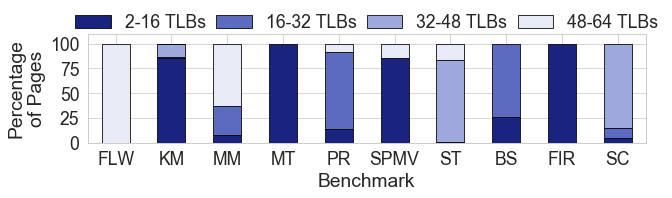

In [6]:
fig, ax = plt.subplots(figsize=(10, 2))
plot_data.plot.bar(
    stacked=True, x='Benchmark',
#     order=["FLW", "KM", "MM", "MT", "PR", "SPMV", "ST", "BS", "FIR", "SC"],
    color=['#1A237E', '#5C6BC0', '#9FA8DA', '#E8EAF6'], ec='k',
    ax=ax)

handles, labels = ax.get_legend_handles_labels()
labels = ['2-16 TLBs', '16-32 TLBs', '32-48 TLBs', '48-64 TLBs' ]
ax.legend(handles, labels, 
          frameon=False,
          fancybox=None, 
          columnspacing=0.6,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.33), loc=9, ncol=4)
ax.set_xticklabels(plot_data['Benchmark'], rotation=0)
ax.set_yticks([0, 25, 50, 75, 100])
ax.set_ylim([0, 110])
ax.set_ylabel('Percentage\nof Pages')

# ax.axvline(6.4, 0, 80, c='k', ls='--')
# ax.text(8, 80, 'TLB Insenstive',  horizontalalignment='center', verticalalignment='center',
#         fontsize=18, bbox=dict(fc='white'))

plt.savefig('page_sharing_entire_gpu.pdf', bbox_inches='tight')
plt.savefig('page_sharing_entire_gpu.png', dpi=600, bbox_inches='tight')
plt.show()
plt.close()